Coded verified and tested by: Mustafa Hassan

Author: josephlee94

Link: https://github.com/josephlee94/intuitive-deep-learning

In [17]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
df = pd.read_csv('housepricedata.csv')

df.head(10)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [18]:
dataset = df.values

dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [19]:
X = dataset[:,0:10]
Y = dataset[:,10]

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [20]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import matplotlib.pyplot as plt

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.7047 - accuracy: 0.4159 - val_loss: 0.6967 - val_accuracy: 0.4612
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4775 - val_loss: 0.6876 - val_accuracy: 0.5297
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.4941 - val_loss: 0.6787 - val_accuracy: 0.5525
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5029 - val_loss: 0.6712 - val_accuracy: 0.5616
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5147 - val_loss: 0.6653 - val_accuracy: 0.5845
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6701 - accuracy: 0.5431 - val_loss: 0.6602 - val_accuracy: 0.6119
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.5793 - val_loss: 0.6555 - val_accuracy: 0.6484
Epoch 8/100
3

In [22]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2741 - accuracy: 0.8950


0.8949771523475647

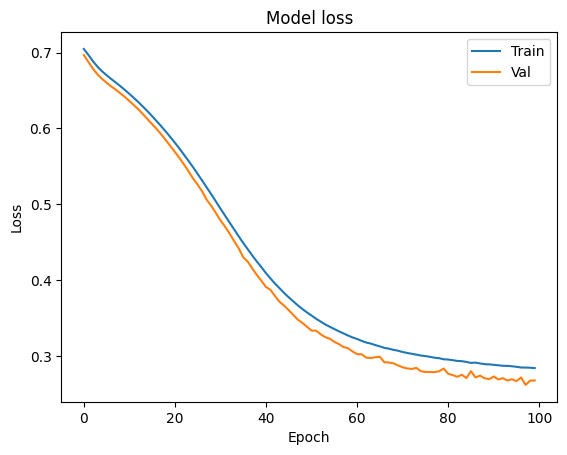

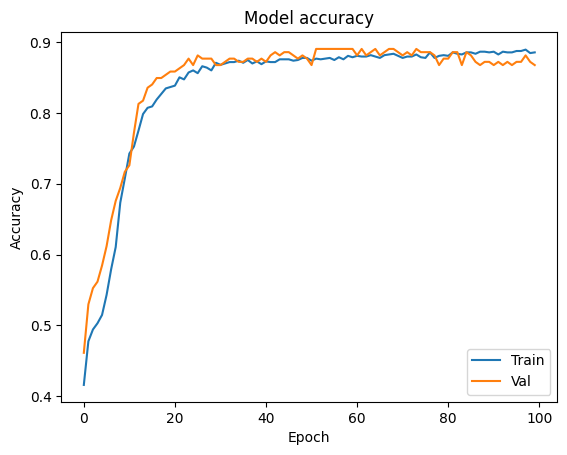

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 71ms/step - loss: 0.4906 - accuracy: 0.7515 - val_loss: 0.3276 - val_accuracy: 0.8813
Epoch 2/100
32/32 [==============================] - 2s 52ms/step - loss: 0.3309 - accuracy: 0.8532 - val_loss: 0.3042 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 2s 74ms/step - loss: 0.3004 - accuracy: 0.8708 - val_loss: 0.2902 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 2s 48ms/step - loss: 0.3076 - accuracy: 0.8845 - val_loss: 0.3073 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 1s 45ms/step - loss: 0.2806 - accuracy: 0.8894 - val_loss: 0.2555 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 1s 43ms/step - loss: 0.2662 - accuracy: 0.8836 - val_loss: 0.2999 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 0.2533 - accuracy: 0.8953 - val_loss: 0.2697 - val_accuracy: 0.8767
Epoch 

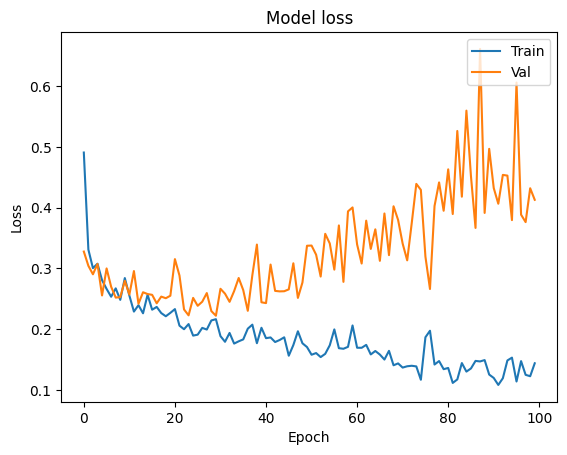

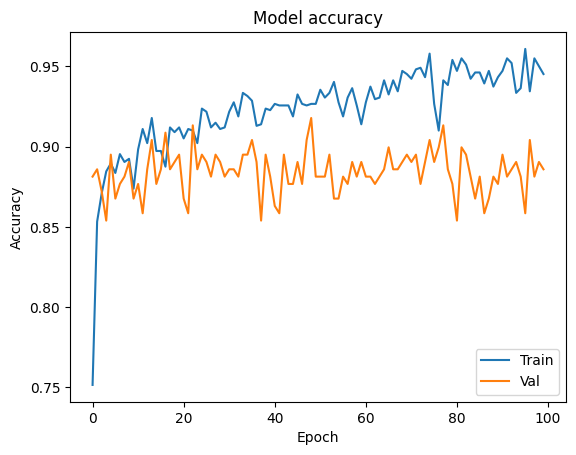

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 4s 95ms/step - loss: 14.2511 - accuracy: 0.6321 - val_loss: 3.8726 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 4s 123ms/step - loss: 1.6757 - accuracy: 0.8337 - val_loss: 0.6692 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 3s 83ms/step - loss: 0.5773 - accuracy: 0.8611 - val_loss: 0.4972 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 3s 88ms/step - loss: 0.5119 - accuracy: 0.8708 - val_loss: 0.4799 - val_accuracy: 0.8995
Epoch 5/100
32/32 [==============================] - 2s 68ms/step - loss: 0.5024 - accuracy: 0.8748 - val_loss: 0.4862 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 2s 71ms/step - loss: 0.4873 - accuracy: 0.8728 - val_loss: 0.4473 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 3s 79ms/step - loss: 0.4878 - accuracy: 0.8728 - val_loss: 0.4353 - val_accuracy: 0.8904
Epoc

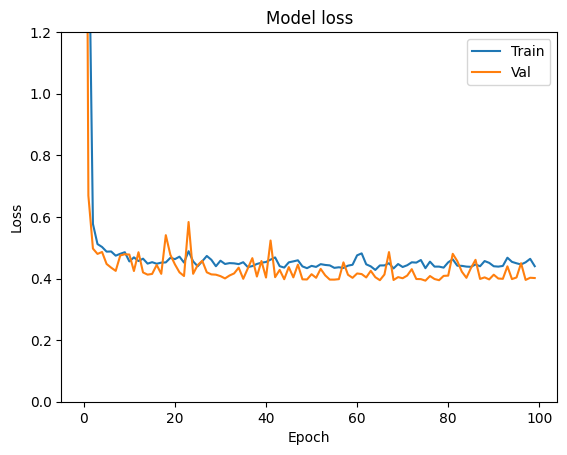

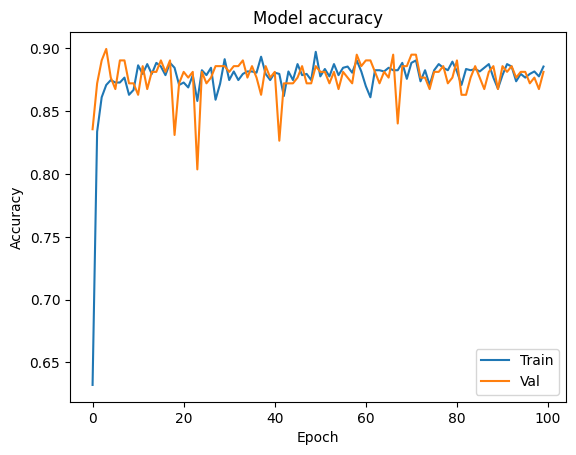

In [28]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()